In [1]:
#imported all necessary packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
#created initial dataframe from nfl combine data from 2009-2019

df = pd.read_csv('/Users/marcinmaleski/Desktop/MDA530/NFL.csv')
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [3]:
#eliminated uncessary columns and dropped all NA values
#configured height and weight columns from metric to standard 

df2 = df[['School', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump',
          'Bench_Press_Reps','Broad_Jump', 'Agility_3cone','Position_Type', 'Drafted']].copy()
df3 = df2.dropna()
df3['Weight'] = df3['Weight'] * 2.2046
df3['Weight'] = df3['Weight'].round(0)
df3['Height'] = df3['Height'] * 3.281
df3['Height'] = df3['Height'].round(1)

/var/folders/9t/1wc6rw8s42dgkg2ynsqn0f440000gn/T/ipykernel_80951/1224592887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Weight'] = df3['Weight'] * 2.2046
/var/folders/9t/1wc6rw8s42dgkg2ynsqn0f440000gn/T/ipykernel_80951/1224592887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Weight'] = df3['Weight'].round(0)
/var/folders/9t/1wc6rw8s42dgkg2ynsqn0f440000gn/T/ipykernel_80951/1224592887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [38]:
#new dataframe
df3.head()

,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Position_Type,Drafted
1,Illinois,6.2,261.0,4.84,83.82,27.0,292.10,7.38,defensive_lineman,Yes
3,Alabama,5.9,203.0,4.49,93.98,15.0,304.80,7.09,defensive_back,Yes
4,Connecticut,6.2,244.0,4.76,92.71,26.0,304.80,7.10,line_backer,Yes
7,North Carolina,6.7,309.0,5.32,55.88,19.0,238.76,7.87,offensive_lineman,Yes
8,Richmond,6.2,266.0,4.53,88.90,28.0,304.80,7.46,defensive_lineman,Yes


In [5]:
#value count 
df3.count()

School              1755
Height              1755
Weight              1755
Sprint_40yd         1755
Vertical_Jump       1755
Bench_Press_Reps    1755
Broad_Jump          1755
Agility_3cone       1755
Position_Type       1755
Drafted             1755
dtype: int64

In [6]:
df3.head()

,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Position_Type,Drafted
1,Illinois,6.2,261.0,4.84,83.82,27.0,292.10,7.38,defensive_lineman,Yes
3,Alabama,5.9,203.0,4.49,93.98,15.0,304.80,7.09,defensive_back,Yes
4,Connecticut,6.2,244.0,4.76,92.71,26.0,304.80,7.10,line_backer,Yes
7,North Carolina,6.7,309.0,5.32,55.88,19.0,238.76,7.87,offensive_lineman,Yes
8,Richmond,6.2,266.0,4.53,88.90,28.0,304.80,7.46,defensive_lineman,Yes


Text(0, 0.5, '')

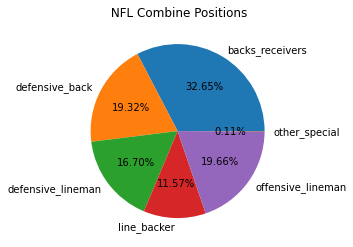

In [7]:
#used a pie chart to visulaize the number of players per position

Position_Count = df3.groupby("Position_Type")["Position_Type"].count()
Position_Count.plot.pie(autopct='%.2f%%', title=" NFL Combine Positions") 
plt.ylabel('')

In [8]:
Backs_recievers = df3.loc[df3['Position_Type'] == 'backs_receivers'] 
br_jump_mean = Backs_recievers['Broad_Jump'].mean()
br_jump_mean

302.2023734729494

In [9]:
Oline_jump = df3.loc[df3['Position_Type'] == 'offensive_lineman']
oline_jump_mean = Oline_jump['Broad_Jump'].mean()
oline_jump_mean

258.43211594202893

In [10]:
dbacks = df3.loc[df3['Position_Type'] == 'defensive_back']
dbacks_jump_mean = dbacks['Broad_Jump'].mean()
dbacks_jump_mean

308.03681415929185

In [11]:
df3['Position_Type'].unique()

array(['defensive_lineman', 'defensive_back', 'line_backer',
       'offensive_lineman', 'backs_receivers', 'other_special'],
      dtype=object)

In [12]:
dline = df3.loc[df3['Position_Type'] == 'defensive_lineman']

In [13]:
dline_jump_mean = dline['Broad_Jump'].mean()
dline_jump_mean

279.76409556313996

In [14]:
lbacks = df3.loc[df3['Position_Type'] == 'line_backer']
lback_jump_mean = lbacks['Broad_Jump'].mean()
lback_jump_mean

297.9432512315271

In [15]:
specialteam = df3.loc[df3['Position_Type'] == 'other_special']
specialteam_jump = specialteam['Broad_Jump'].mean()
specialteam_jump

290.83000000000004

In [16]:
jumpavg = df3['Broad_Jump'].mean()
jumpavg

290.47324216524225

Text(0, 0.5, 'Broad Jump Distance CM')

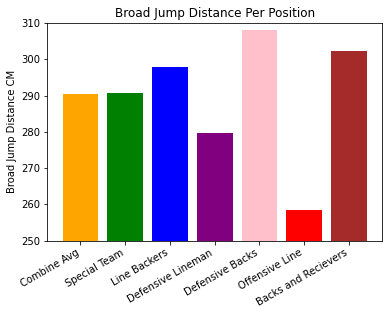

In [17]:
#found the average broad jump distance per position and used a bar graph to show the comparisons between positons.

Player_Pos_jump = (jumpavg, specialteam_jump, lback_jump_mean,
                   dline_jump_mean, dbacks_jump_mean, oline_jump_mean, br_jump_mean)
Pos = ('Combine Avg', 'Special Team', 'Line Backers',
      'Defensive Lineman', 'Defensive Backs', 'Offensive Line', 'Backs and Recievers')


plt.bar(Pos[0], Player_Pos_jump[0], color = "orange")
plt.bar(Pos[1], Player_Pos_jump[1], color = "green")
plt.bar(Pos[2], Player_Pos_jump[2], color = "blue")
plt.bar(Pos[3], Player_Pos_jump[3], color = "purple")
plt.bar(Pos[4], Player_Pos_jump[4], color = "pink")
plt.bar(Pos[5], Player_Pos_jump[5], color = "red")
plt.bar(Pos[6], Player_Pos_jump[6], color = "brown")

plt.ylim(250, 310)
plt.xticks(rotation=30, ha='right')
plt.title('Broad Jump Distance Per Position')
plt.ylabel('Broad Jump Distance CM')

Text(0.5, 20.799999999999983, 'Weight lbs')

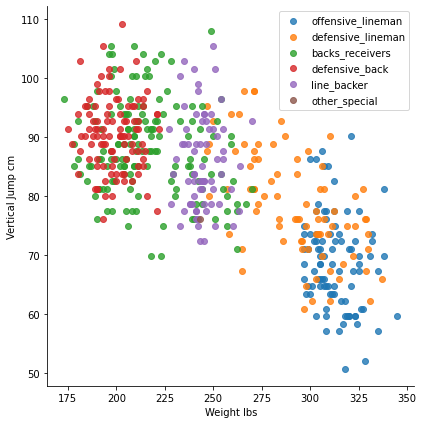

In [18]:
#created a scatter plot to show the direct correlation of a players weight, and how high they could jump. 

scatter = df3.sample(n=500)
sns.lmplot( x="Weight", y="Vertical_Jump", height = 6, data=scatter, fit_reg=False, hue='Position_Type',
           legend=False,)
plt.legend(loc='upper right')
plt.ylabel('Vertical Jump cm')
plt.xlabel('Weight lbs')



Text(0, 0.5, 'Frequency')

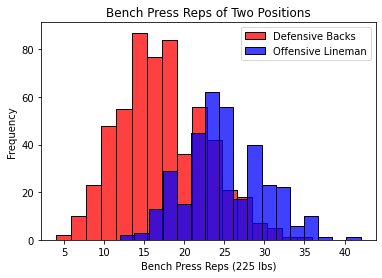

In [30]:
#used two seperate historgrams to show a direct comparison of two different positions doing the bench press test.

sns.histplot(Backs_recievers['Bench_Press_Reps'],  kde=False, label='Defensive Backs',
             color = 'red', bins = 17)
sns.histplot(Oline_jump ['Bench_Press_Reps'], kde=False, label='Offensive Lineman',
             color = 'blue', bins = 17)
plt.legend(prop={'size': 10})
plt.title('Bench Press Reps of Two Positions')
plt.xlabel('Bench Press Reps (225 lbs)')
plt.ylabel('Frequency')

In [20]:
df3[['Weight','Height']].corr()

,Weight,Height
Weight,1.000000,0.731324
Height,0.731324,1.000000


<AxesSubplot:>

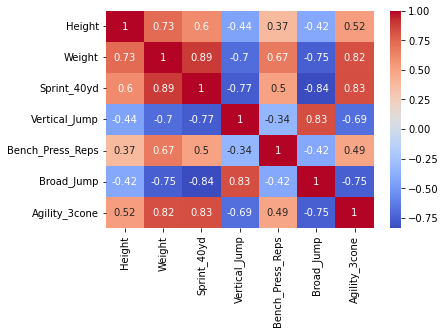

In [21]:
#created a heatmap to show the direct correlations between each column 
sns.heatmap(df3.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


Text(0, 0.5, 'Player Position')

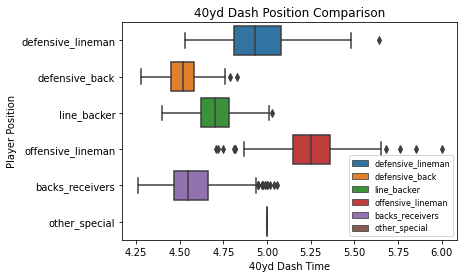

In [37]:
#visualized the comparison of 40 yard dash test per position by implementing a box graph 

sns.boxplot(data=df3, x="Sprint_40yd", y="Position_Type", hue="Position_Type", dodge=False)
plt.legend(loc='upper right')
plt.legend(prop={'size': 8})
plt.title('40yd Dash Position Comparison')
plt.xlabel('40yd Dash Time')
plt.ylabel('Player Position')